# AI6 Training Exercise - University Admission Prediction
## Predicción de admisión a la universidad mediante diferentes parámetros
# ***SOLUCIÓN***

*Autores: Mohan S Acharya, Asfia Armaan, Aneeta S Antony*

*Source: Indian Institutes of Technology*

El dataset contiene los datos relacionados con la probabilidad de admisión de diferentes estudiantes hindúes en las diferentes escuelas IIT, las más prestigiosas del país.

La predicción de probabilidad de admisión va del 0-1.

Este dataset contiene varios parámetros que se consideran importantes en el proceso de admisión a los diferentes programas de máster en IIT:
1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 )
6. Research Experience ( either 0 or 1 )
7. Chance of Admit ( ranging from 0 to 1 )

![Entrada principal al edificio de IIT Delhi](https://s3.ap-southeast-1.amazonaws.com/images.asianage.com/images/aa-Cover-cmrb66stiu4qb3nga8t6dmj1c1-20170504020730.Medi.jpeg)
<p style="text-align: center;"><em>Fig 1. Indian Institute of Technology in Delhi</em></p>

La principal tarea será predecir la probabilidad de admisión de nuevos aplicantes a estos programas. También será necesario obtener información esencial sobre nuestro dataset y conseguir la feature importance de los diferentes parámetros para ayudar a determinar las áreas más importantes para futuros estudiantes.

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Crear dataframe a partir de .csv
df = pd.read_csv("data/admission.csv")

# Mostrar número de filas y columnas del dataframe
print("Filas: " + str(df.shape[0]) + " Cols: " + str(df.shape[1]))

# Mostrar las primeras 10 filas
display(df.head(10))
display(df.columns)

Filas: 500 Cols: 9


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [3]:
#El número de serie del alumno no se considera una variable importante por lo que la eliminaremos del dataset
df.drop(["Serial No."], axis=1, inplace=True)

#Simplificamos nombres de columnas para que sea mas fácil.
df = df.rename(index=str, columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL", "University Rating": "URat", "LOR ": "LOR", "Chance of Admit ": "Chance"})

df.head()

,GRE,TOEFL,URat,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Hallar número de valores únicos en cada columna
df.nunique()

GRE          49
TOEFL        29
URat          5
SOP           9
LOR           9
CGPA        184
Research      2
Chance       61
dtype: int64

In [5]:
# Comprobar la existencia de valores nulos en el dataset
df.isnull().sum()

GRE         0
TOEFL       0
URat        0
SOP         0
LOR         0
CGPA        0
Research    0
Chance      0
dtype: int64

In [6]:
# Mostrar información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE         500 non-null int64
TOEFL       500 non-null int64
URat        500 non-null int64
SOP         500 non-null float64
LOR         500 non-null float64
CGPA        500 non-null float64
Research    500 non-null int64
Chance      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 35.2+ KB


In [7]:
# Descripción analítica básica del dataframe
display(np.round(df.describe()))

,GRE,TOEFL,URat,SOP,LOR,CGPA,Research,Chance
count,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,316.0,107.0,3.0,3.0,3.0,9.0,1.0,1.0
std,11.0,6.0,1.0,1.0,1.0,1.0,0.0,0.0
min,290.0,92.0,1.0,1.0,1.0,7.0,0.0,0.0
25%,308.0,103.0,2.0,2.0,3.0,8.0,0.0,1.0
50%,317.0,107.0,3.0,4.0,4.0,9.0,1.0,1.0
75%,325.0,112.0,4.0,4.0,4.0,9.0,1.0,1.0
max,340.0,120.0,5.0,5.0,5.0,10.0,1.0,1.0


### Establecer las relaciones entre las features

,GRE,TOEFL,URat,SOP,LOR,CGPA,Research,Chance
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
URat,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


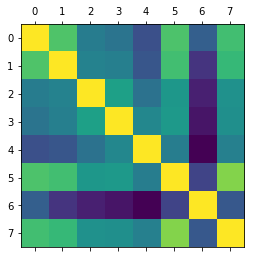

In [8]:
# Mostrar matriz de correlación de variables
# Pista: explore plt.matshow y corr() de un dataframe
correlation = df.corr()
display(correlation)
plt.matshow(correlation)

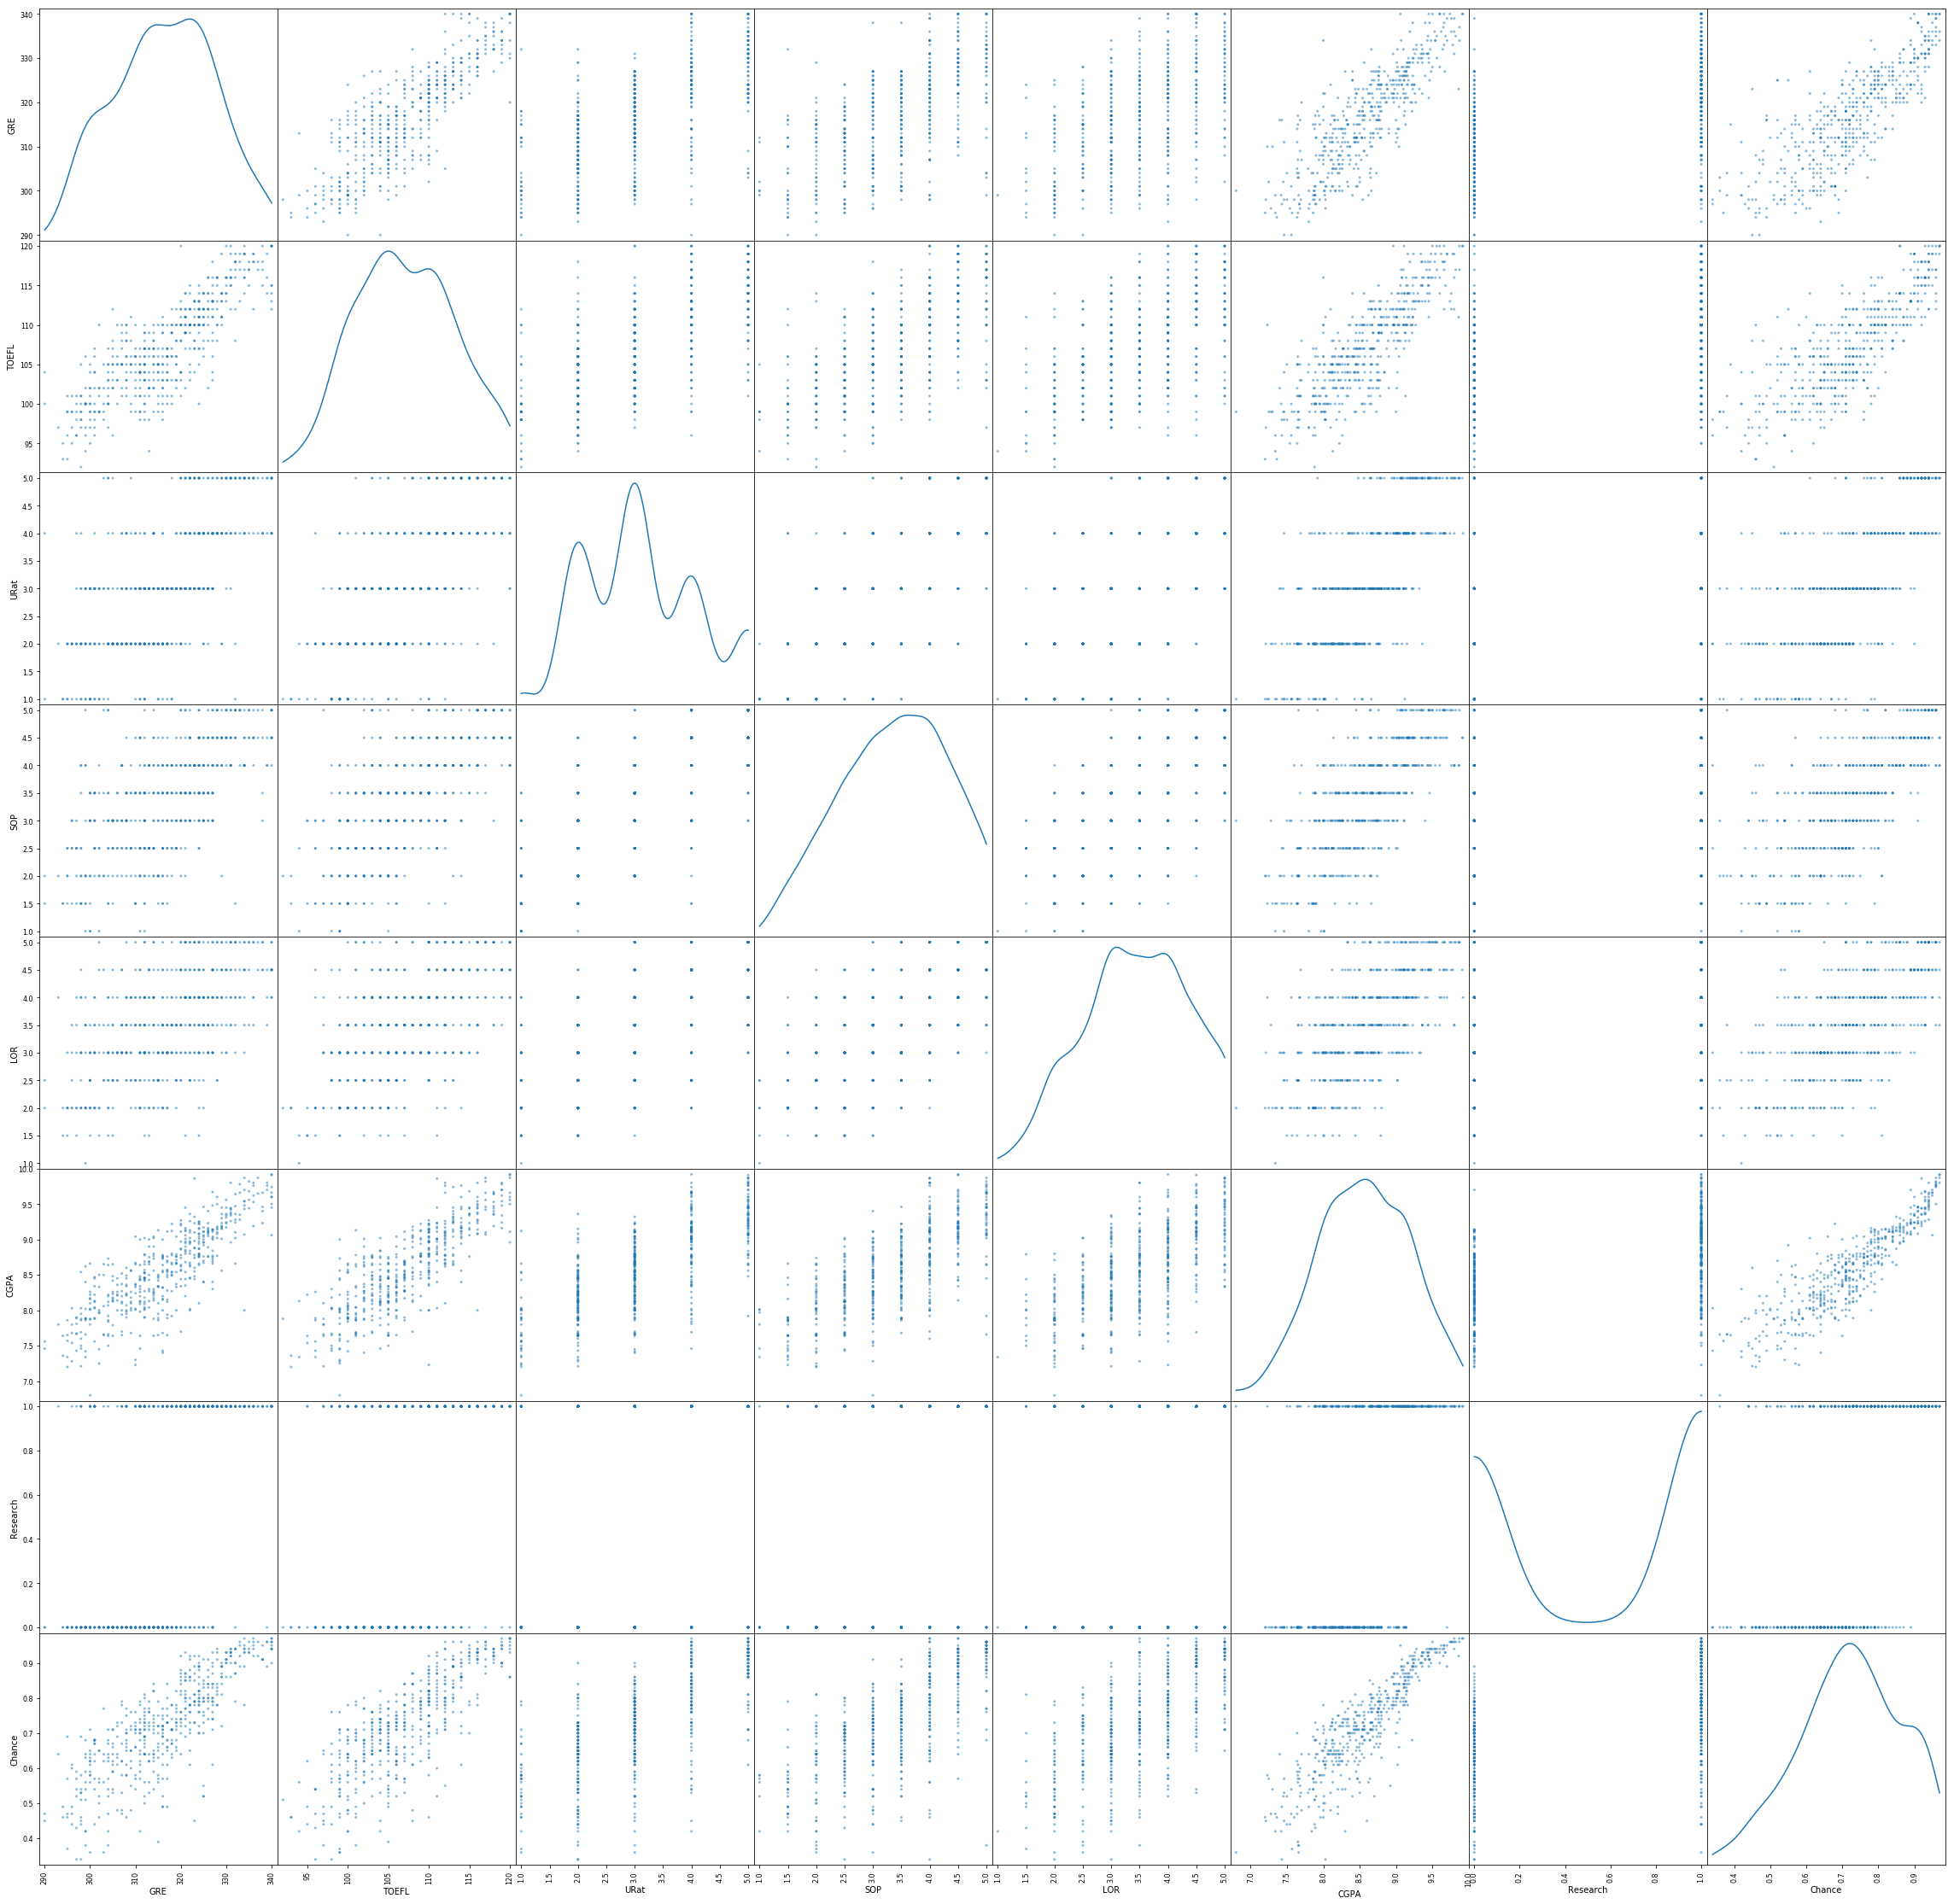

In [9]:
# Mostrar correlaciones como una función discreta entre las diferentes variables con una matriz
# útil para apreciar relaciones lineales

# Pista: explore pd.plotting.scatter_matrix
pd.plotting.scatter_matrix(df, figsize = (40,40), diagonal = 'kde');

### Extraer features más importantes a través de un RF, usar función de *fastai* en su lugar

In [10]:
# Crear un dataframe solo con la columna de la variable dependiente
chance_raw = df["Chance"]
# Crear un dataframe con las variables independientes
features_raw = df.drop(["Chance"], axis = 1)

# Definir un RF con diferentes hiperparámetros (¡experimentar!)
clf = RandomForestRegressor(n_estimators=150, max_depth=3 , random_state=42)

# Entrenar un RF con la totalidad del dataset
clf.fit(features_raw, chance_raw)

######

feature_list = list(zip(df.columns.values, clf.feature_importances_))
sorted_by_importance = sorted(feature_list, key=lambda x: x[1], reverse=True)

for feat, value in sorted_by_importance:
    print(feat, value)

CGPA 0.9367897579856241
GRE 0.04412570336164081
TOEFL 0.011856100180138735
Research 0.002253030685136513
SOP 0.002203332507366155
LOR 0.0015521936563487578
URat 0.0012198816237444664


In [11]:
# Partir el test en cierta proporción (¡experimentar!)
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    chance_raw, 
                                                    test_size = 0.20, 
                                                    random_state = 42)
######

print("El dataset de training tiene {} elementos.".format(X_train.shape[0]))
print("El dataset de testing tiene {} elementos.".format(X_test.shape[0]))

El dataset de training tiene 400 elementos.
El dataset de testing tiene 100 elementos.


In [12]:
# Definir un rfregressor
classifier = RandomForestRegressor(n_estimators=500, min_samples_leaf=5, random_state=42)

# Entrenar el regresor con el dataset de train
classifier.fit(X_train, y_train)

# Predecir valores para las variables independientes de test
predicted = classifier.predict(X_test)

# Calcular la precisión
# Pista: explorar sklearn.metrics
print("Precisión global: " + str(metrics.r2_score(y_test, predicted)))
print("MSE: " + str(metrics.mean_squared_error(y_test, predicted)))

Precisión global: 0.8120267284956776
MSE: 0.0038440534022633937
